### <center> The NIPS 2003 feature selection challenge: The Madelon dataset </center>

In [1]:
import pandas as pd
url = "https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_5e663c1c99c7443d95a7f8c00f216857.csv"
df=pd.read_csv(url,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,485,477,537,479,452,471,491,476,475,473,...,481,477,485,511,485,481,479,475,496,-1
1,483,458,460,487,587,475,526,479,485,469,...,478,487,338,513,486,483,492,510,517,-1
2,487,542,499,468,448,471,442,478,480,477,...,481,492,650,506,501,480,489,499,498,-1
3,480,491,510,485,495,472,417,474,502,476,...,480,474,572,454,469,475,482,494,461,1
4,484,502,528,489,466,481,402,478,487,468,...,479,452,435,486,508,481,504,495,511,1


In [2]:
df.shape

(2000, 501)

Separate the predictor variables and target variable.

In [4]:
X=df.iloc[:,0:500]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [5]:
y=pd.DataFrame(df.iloc[:,500])
y.head()

,500
0,-1
1,-1
2,-1
3,1
4,1


Determine the optimal number of features, using RFECV on RandomForestClassifier.

In [6]:
n_samples=y.shape[0]
n_samples

2000

In [7]:
import numpy as np
y=np.asarray(y).reshape(n_samples,)
y

array([-1, -1, -1, ..., -1,  1,  1])

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


estimator=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
features=RFECV(estimator,step=1,cv=StratifiedKFold(3),scoring="accuracy")
features.fit(X, y)

print("Optimal number of features : %d" % features.n_features_)

Optimal number of features : 21


<Figure size 640x480 with 1 Axes>

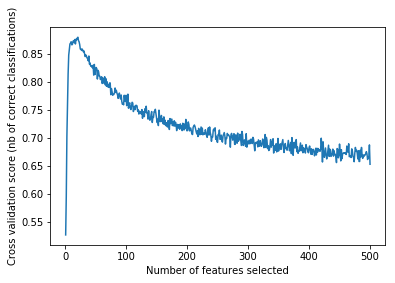

In [10]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(features.grid_scores_) + 1), features.grid_scores_)
plt.show()

The Madelon dataset has 500 attributes. However, the RFECV algorithm shows that the optimal number of features to use is 21. Next, we are going to run RFE to output the 21 most relevant attributes.

In [13]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, n_features_to_select=21, step=1)
selector = selector.fit(X, y)
selector=pd.DataFrame(selector.ranking_).rename(columns={0:"Importance"})
selector

,Importance
0,411
1,188
2,34
3,335
4,11
5,368
6,124
7,470
8,265
9,425


The 21 most important features have label "1".

In [14]:
features=selector[selector["Importance"]==1]
features

,Importance
28,1
48,1
64,1
105,1
128,1
153,1
241,1
281,1
318,1
334,1


Form the predictor set.

In [15]:
X=X.iloc[:,features.index]
X.head()

,28,48,64,105,128,153,241,281,318,334,...,338,378,433,442,451,453,455,472,475,493
0,459,440,648,181,452,575,434,517,414,496,...,628,419,533,568,463,471,630,515,401,485
1,475,499,488,431,473,404,551,435,469,460,...,528,526,442,463,474,311,582,465,549,338
2,491,460,485,593,487,585,474,535,506,449,...,431,464,569,503,481,606,424,485,454,650
3,472,529,415,698,493,591,569,526,458,513,...,377,553,565,447,472,545,456,457,602,572
4,472,429,387,451,475,448,538,456,462,524,...,509,424,462,536,472,426,465,500,560,435


Split X (the predictors) and y (the target) into train and test subsets.

Search for the optimal hyper-parameters for RandomForestClassifer.

In [23]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
tree = RandomForestClassifier(class_weight="balanced_subsample",criterion="entropy",random_state=0)
rf_random = RandomizedSearchCV(estimator =tree, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [25]:
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verb

In [26]:
rf_random.best_params_

{'n_estimators': 466,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [27]:
from sklearn.metrics import accuracy_score
best_random = rf_random.best_estimator_
y_pred=best_random.predict(X)
print("Accuracy on the Modelon train set : ",accuracy_score(y,y_pred))

Accuracy on the Modelon train set :  1.0


Load the Meldon validation data.

In [28]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_c5fff73062284a09920e27a021b0e309.csv"
df_v=pd.read_csv(url, header=None)
df_v.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,454,513,495,523,469,453,477,506,479,...,480,543,259,413,520,485,498,523,510,-1
1,485,508,493,487,478,472,504,476,479,475,...,480,535,534,514,452,484,495,548,477,-1
2,483,521,507,475,493,486,421,475,496,483,...,476,498,495,508,528,486,465,508,503,-1
3,474,504,576,480,553,483,524,478,483,483,...,475,470,463,509,525,479,467,552,517,1
4,495,474,523,479,495,488,485,476,497,478,...,471,522,343,509,520,475,493,506,491,-1


Select from the validation data the 21 features that were used to train the model.

In [29]:
X_v=df_v.iloc[:,0:500]
X_v=X_v.iloc[:,features.index]
X_v.head()

,28,48,64,105,128,153,241,281,318,334,...,338,378,433,442,451,453,455,472,475,493
0,490,436,450,420,472,409,541,432,513,550,...,523,423,427,444,486,300,548,454,538,259
1,491,544,629,541,480,567,456,519,522,471,...,484,580,559,414,484,523,547,439,429,534
2,479,437,426,500,480,485,517,471,482,506,...,485,432,485,526,477,479,457,494,517,495
3,472,447,574,314,463,405,425,426,458,492,...,700,443,427,649,472,453,525,540,386,463
4,469,501,499,395,471,417,537,434,451,489,...,609,517,448,518,470,368,570,487,527,343


In [32]:
y_v=pd.DataFrame(df_v.iloc[:,500])
y_v.head()

,500
0,-1
1,-1
2,-1
3,1
4,-1


In [33]:
y_v_pred=best_random.predict(X_v)
print("Accuracy on Madelon validation data is: ", accuracy_score(y_v,y_v_pred))

Accuracy on Madelon validation data is:  0.8916666666666667


In [36]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix on Madelon validation data: \n", confusion_matrix(y_v,y_v_pred))

Confusion matrix on Madelon validation data: 
 [[265  35]
 [ 30 270]]


In [53]:
np.unique(y_v)

array([-1,  1])

In [56]:
from sklearn.metrics import classification_report
target_names=["-1","1"]
print("Classification report for Madelon validation data: \n", classification_report(y_v, y_v_pred,target_names=target_names))

Classification report for Madelon validation data: 
               precision    recall  f1-score   support

          -1       0.90      0.88      0.89       300
           1       0.89      0.90      0.89       300

   micro avg       0.89      0.89      0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

